In [5]:
indices = [1,2]
for i, ind in enumerate(indices):
    print(i)
    print(ind)

0
1
1
2


In [6]:
import numpy as np
def get_trans_mx(trans_vec):
    '''
    Input:
        trans_vec -- Translation vector represented by an 1D numpy array with 3
        elements
    Output:
        A 4x4 numpy array representing 3D translation.
    '''
    assert trans_vec.ndim == 1
    assert trans_vec.shape[0] == 3

    trans_mx = np.eye(4)
    trans_mx[:3, 3] = trans_vec

    return trans_mx

In [7]:
trans = np.array([1,2,3])
print(get_trans_mx(trans))

[[1. 0. 0. 1.]
 [0. 1. 0. 2.]
 [0. 0. 1. 3.]
 [0. 0. 0. 1.]]


In [8]:

def get_scale_mx(s_x, s_y, s_z):
    '''
    Input:
        s_x -- Scaling along the x axis
        s_y -- Scaling along the y axis
        s_z -- Scaling along the z axis
    Output:
        A 4x4 numpy array representing 3D scaling.
    '''
    # Note: For MOPS, you need to use s_x and s_y only, since we are in 2D
    scale_mx = np.eye(4)

    for i, s in enumerate([s_x, s_y, s_z]):
        scale_mx[i, i] = s

    return scale_mx

In [9]:
print(get_scale_mx(1,2,3))

[[1. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 1.]]


In [11]:
import cv2
import numpy as np
import transformations
import matplotlib as plt

# Load an image
image = cv2.imread('images/left.jpg')
image_float32 = image.astype(np.float32) / 255
# Get the image dimensions
(h, w) = image.shape[:2]

# Define the center of the image

# Create a rotation matrix
M = transformations.get_rot_mx(90)
M = transformations.delete_last_row(M)

# Apply the affine transformation
rotated = cv2.warpAffine(image_float32, M,dsize=(h,w))

# Display the result
cv2.imshow('Warped Image', rotated)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
'''
测试cv2.warpaffine
'''
import cv2
import numpy as np
import transformations
# 读取图像
image = cv2.imread('images/left.jpg')
height, width = image.shape[:2]

# 定义平移量
translate_x = 50  # 向右平移
translate_y = 30  # 向下平移

# 创建平移矩阵
M = np.array([[1, 0, translate_x],
              [0, 1, translate_y]], dtype=np.float32)

# 计算新宽和高，防止内容丢失
# new_width = width + translate_x
# new_height = height + translate_y

# # 应用仿射变换
warped_image = cv2.warpAffine(image, M, (width,height), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

# myM = transformations.get_trans_mx(np.array([50,30]))
# mywarped = cv2.warpAffine(image,myM,(width,height), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

# # 显示结果
cv2.imshow('Warped Image', warped_image)
# cv2.imshow('my warped image',mywarped)
cv2.waitKey(0)
cv2.destroyAllWindows()
# 

In [13]:

import cv2
import numpy as np
import transformations
# 测试rotation
R = cv2.getRotationMatrix2D(center=(0,0),angle = 90,scale=1)

rotated_image = cv2.warpAffine(image,R,(width,height),borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))
# cv2.imshow('original image',image)
# cv2.imshow('rotated Image', rotated_image)
# # cv2.imshow('my warped image',mywarped)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
print("rotation matrix:",R)

rotation matrix: [[ 6.123234e-17  1.000000e+00  0.000000e+00]
 [-1.000000e+00  6.123234e-17  0.000000e+00]]


In [14]:
MyR = transformations.get_rot_mx(np.pi/2)
# MyR=np.transpose(MyR)
MyR=transformations.delete_last_row(MyR)
# MyT = transformations.get_trans_mx(np.array([100,100]))
# MyMx = np.dot(MyT,MyR)
Myrotate = cv2.warpAffine(image,MyR,(width,height))
cv2.imshow('cv2 rotated',rotated_image)
cv2.imshow('my rotated',Myrotate)
cv2.waitKey(0)
cv2.destroyAllWindows()
# print(MyMx)
print("rotation matrix:",MyR)
# print("translate matrix",MyT)

rotation matrix: [[ 6.123234e-17  1.000000e+00  0.000000e+00]
 [-1.000000e+00  6.123234e-17  0.000000e+00]]


In [24]:
MyR.dtype

dtype('float64')

In [ ]:
import math
point = cv2.KeyPoint(x=1,y=2,angle = 90,size=1)
angle = point.angle
print(angle)
print(math.sin(math.radians(angle)))
print(math.sin(angle*np.pi/180))

90.0
1.0
1.0


In [27]:
s_matrix = transformations.get_scale_mx(2,2)
s_matrix = transformations.delete_last_row(s_matrix)
s_matrix = s_matrix.astype(float)
image_scaled = cv2.warpAffine(image,s_matrix,(width,height))
cv2.imshow('scaled',image_scaled)
cv2.waitKey(0)
cv2.destroyAllWindows()
# s_matrix.dtype

In [72]:
s_matrix = transformations.get_scale_mx(0.2,0.2)
translation = transformations.get_trans_mx(np.array([400,400]))
translation_inverse = np.linalg.inv(translation)
r_matrix = transformations.get_rot_mx(np.pi/2)
final_matrix = np.dot(np.dot(np.dot(translation,r_matrix),s_matrix),translation_inverse)
# final_matrix = np.dot(np.dot(translation,r_matrix),translation_inverse)
final_matrix = transformations.delete_last_row(final_matrix)
# mat = np.multiply(s_matrix,r_matrix)

image_affined = cv2.warpAffine(image,final_matrix,(width,height))
keypoint = image_affined[100,100]


print(final_matrix)
print(image_affined)
# print(cv2.WARP_INVERSE_MAP)
cv2.imshow('scaled',image_affined)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[ 1.2246468e-17  2.0000000e-01  3.2000000e+02]
 [-2.0000000e-01  1.2246468e-17  4.8000000e+02]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [76]:
import features
import cv2
det = features.HarrisKeypointDetector

image_float32 = image.astype(np.float32) / 255
image_gray = cv2.cvtColor(image_float32,cv2.COLOR_BGR2GRAY)
image_gray_gaussian = cv2.GaussianBlur(image,ksize=(5,5),sigmaX=1)

keypoints = det.detectKeypoints(self=det,image=image_gray_gaussian)

windowSize = 8
key_len = len(keypoints)
height, width = image_gray.shape

desc = np.zeros((key_len,windowSize*windowSize))

for i in range(key_len):
    angle = -1 * keypoints[i].angle
    x, y = keypoints[i].pt
    angle_in_radian = math.radians(angle)

    s_matrix = transformations.get_scale_mx(0.2,0.2)
    translation = transformations.get_trans_mx(np.array([x,y]))
    translation_inverse = np.linalg.inv(translation)
    r_matrix = transformations.get_rot_mx(angle_in_radian)
    final_matrix = np.dot(np.dot(np.dot(translation,r_matrix),s_matrix),translation_inverse)
    final_matrix = transformations.delete_last_row(final_matrix)

    image_affined = cv2.warpAffine(image_gray_gaussian,final_matrix,dsize=(width,height))

TypeError: HarrisKeypointDetector.computeHarrisValues() missing 1 required positional argument: 'srcImage'

In [77]:
for i in range(10):
    if i > 5:
        break
print(i)

6


In [93]:
distances=np.array(
    [
        [1,5,7,3,6,9,5,4,10],
        [19308,123,41245,6457,32478,323,0,1,2],
        [1,6,2,3,5,7,2,7,9]
    ]
)
indices = np.argmax(distances,axis=0)
indices[1]
dis_sor = sorted(distances,key=lambda x:x[0])
dis_sor
# indices = np.argsort(distances[:, 2])
# indices
# keypoints = [
#                 cv2.KeyPoint(x=1,y=1,size=10,response=10),
#                 cv2.KeyPoint(x=1,y=1,size=10,response=10),
#                 cv2.KeyPoint(x=1,y=1,size=10,response=10),
# ]
# k = [keypoints[i] for i in indices]
# k

[array([ 1,  5,  7,  3,  6,  9,  5,  4, 10]),
 array([1, 6, 2, 3, 5, 7, 2, 7, 9]),
 array([19308,   123, 41245,  6457, 32478,   323,     0,     1,     2])]

In [96]:
import numpy as np

# 创建一个示例 NumPy 数组，包含三列
data = np.array([[1, 4, 3],
                 [2, 2, 5],
                 [3, 1, 6],
                 [4, 3, 2]])
# 获取按第二列排序的索引
sorted_indices = np.argsort(data[:, 0])  # 0是第一列，1是第二列

# 使用索引重排数组
sorted_data = data[sorted_indices]

print("Sorted data by second column:")
print(sorted_data)

Sorted data by second column:
[[1 4 3]
 [2 2 5]
 [3 1 6]
 [4 3 2]]


In [100]:
import pandas as pd
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
                   'C': ['a', 'd', 'e']})
pd.get_dummies(df)

,A_a,A_b,B_a,B_b,B_c,C_a,C_d,C_e
0,True,False,False,True,False,True,False,False
1,False,True,True,False,False,False,True,False
2,True,False,False,False,True,False,False,True


In [108]:
for i in range(0,5):
    print(i,end=" ")
print("")
for j in range(5):
    print(j,end=" ")

0 1 2 3 4 
0 1 2 3 4 

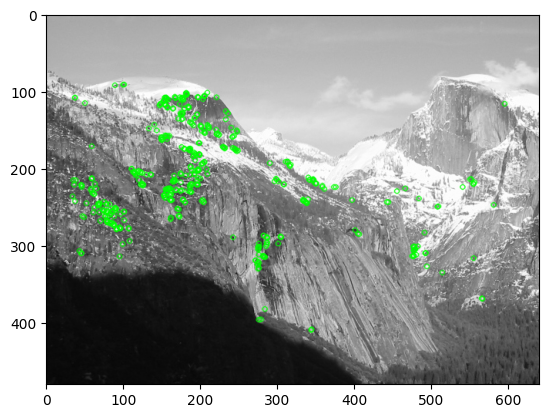

(<matplotlib.image.AxesImage at 0x132066910>, None)

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('images/left.jpg', cv.IMREAD_GRAYSCALE)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()